In [728]:
#Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from pprint import pprint
import numpy as np


#import chardet

In [729]:
#Reference to world_bank_data file
csv_path = Path("Resources/world_bank_data.csv")
world_bank_df = pd.read_csv(csv_path,encoding='latin-1')
world_bank_df.head(40)

#with open("Resources/world_bank_data.csv", "rb") as file:
#result = chardet.detect(file.read())
#print(result)

,Country Name,Region Code,Country Code,"GDP, PPP (current international $)","Population, total",Population CGR 1960-2015,Internet users (per 100 people),Popltn Largest City % of Urban Pop,"2014 Life expectancy at birth, total (years)","Literacy rate, adult female (% of females ages 15 and above)",Exports of goods and services (% of GDP)
0,Aruba,MA,ABW,NaN,"103,889",1.19%,88.7,NaN,75.5,97.513962,NaN
1,Andorra,EU,AND,NaN,"70,473",3.06%,96.9,NaN,NaN,NaN,NaN
2,Afghanistan,ME,AFG,"62,912,669,167","32,526,562",2.36%,8.3,53.40%,60.4,23.873850,0.073278
3,Angola,AF,AGO,"184,437,662,368","25,021,974",2.87%,12.4,50.00%,52.3,60.744801,0.373074
4,Albania,EU,ALB,"32,663,238,936","2,889,167",1.07%,63.3,27.30%,77.8,96.769691,0.271050
5,Arab World,NaN,ARB,"6,435,291,560,152","392,022,276",2.66%,39.5,29.80%,70.6,NaN,NaN
6,United Arab Emirates,ME,ARE,"643,166,288,737","9,156,963",8.71%,91.2,30.80%,77.4,95.076340,NaN
7,Argentina,SA,ARG,"882,358,844,160","43,416,755",1.36%,69.4,38.10%,76.2,98.134781,0.110578
8,Armenia,RU,ARM,"25,329,201,238","3,017,712",0.88%,58.2,55.20%,74.7,99.730469,0.297334
9,American Samoa,PA,ASM,NaN,"55,538",1.87%,NaN,NaN,NaN,NaN,NaN


In [730]:
# Import the World Bank GDP file.csv file as a DataFrame
# world_bank_df = pd.DataFrame(pd.read_csv("Resources/world_bank_data.csv", encoding='windows-1252',keep_default_na = True))
# world_bank_df.head(40)

world_bank_df.dropna(subset=['Region Code'], inplace=True)
world_bank_df.head(40)
#print(world_bank_df.info())


,Country Name,Region Code,Country Code,"GDP, PPP (current international $)","Population, total",Population CGR 1960-2015,Internet users (per 100 people),Popltn Largest City % of Urban Pop,"2014 Life expectancy at birth, total (years)","Literacy rate, adult female (% of females ages 15 and above)",Exports of goods and services (% of GDP)
0,Aruba,MA,ABW,NaN,"103,889",1.19%,88.7,NaN,75.5,97.513962,NaN
1,Andorra,EU,AND,NaN,"70,473",3.06%,96.9,NaN,NaN,NaN,NaN
2,Afghanistan,ME,AFG,"62,912,669,167","32,526,562",2.36%,8.3,53.40%,60.4,23.873850,0.073278
3,Angola,AF,AGO,"184,437,662,368","25,021,974",2.87%,12.4,50.00%,52.3,60.744801,0.373074
4,Albania,EU,ALB,"32,663,238,936","2,889,167",1.07%,63.3,27.30%,77.8,96.769691,0.271050
6,United Arab Emirates,ME,ARE,"643,166,288,737","9,156,963",8.71%,91.2,30.80%,77.4,95.076340,NaN
7,Argentina,SA,ARG,"882,358,844,160","43,416,755",1.36%,69.4,38.10%,76.2,98.134781,0.110578
8,Armenia,RU,ARM,"25,329,201,238","3,017,712",0.88%,58.2,55.20%,74.7,99.730469,0.297334
9,American Samoa,PA,ASM,NaN,"55,538",1.87%,NaN,NaN,NaN,NaN,NaN
10,Antigua and Barbuda,MA,ATG,"2,108,847,544","91,818",0.95%,65.2,NaN,75.9,NaN,0.439860


In [731]:
#Find world_bank_df data types
world_bank_df.dtypes

Country Name                                                     object
Region Code                                                      object
Country Code                                                     object
GDP, PPP (current international $)                               object
 Population, total                                               object
Population CGR 1960-2015                                         object
Internet users (per 100 people)                                 float64
Popltn Largest City % of Urban Pop                               object
2014 Life expectancy at birth, total (years)                    float64
Literacy rate, adult female (% of females ages 15 and above)    float64
Exports of goods and services (% of GDP)                        float64
dtype: object

In [732]:
#List of columns
world_bank_df.columns

Index(['Country Name', 'Region Code', 'Country Code',
       'GDP, PPP (current international $)', ' Population, total ',
       'Population CGR 1960-2015', 'Internet users (per 100 people)',
       'Popltn Largest City % of Urban Pop',
       '2014 Life expectancy at birth, total (years)',
       'Literacy rate, adult female (% of females ages 15 and above)',
       'Exports of goods and services (% of GDP)'],
      dtype='object')

In [720]:
# Delete empty region codes
#world_bank_df['Region Code'].replace("NorthAmerica", "NorthA")
#world_bank_df.dropna()
#world_bank_df.head(40)
#world_bank_df.dropna(subset=['Region Code'], inplace=True)
#world_bank_df["Region Code"].value_counts()
#remove_blank_rc_world_bank_df = world_bank_df.dropna(subset=['Region Code'])
#remove_blank_rc_world_bank_df.head(40)

In [733]:
#Rename columns 
#world_bank_df.columns = world_bank_df.columns.str[0]
rename_world_bank_df = world_bank_df.rename(columns={"GDP, PPP (current international $)":"GDP ($)",
                                              " Population, total ":"Population Total",
                                              "Internet users (per 100 people)":"Internet Users per 100",
                                              "Popltn Largest City % of Urban Pop":"Pop. Largest City (%)",
                                              "2014 Life expectancy at birth, total (years)":"Life Expectancy",
                                              "Literacy rate, adult female (% of females ages 15 and above)":"Female Literacy Rate (%)",
                                              "Exports of goods and services (% of GDP)":"Exportation (% of GDP)"
                                              })
rename_world_bank_df.head(40)


,Country Name,Region Code,Country Code,GDP ($),Population Total,Population CGR 1960-2015,Internet Users per 100,Pop. Largest City (%),Life Expectancy,Female Literacy Rate (%),Exportation (% of GDP)
0,Aruba,MA,ABW,NaN,"103,889",1.19%,88.7,NaN,75.5,97.513962,NaN
1,Andorra,EU,AND,NaN,"70,473",3.06%,96.9,NaN,NaN,NaN,NaN
2,Afghanistan,ME,AFG,"62,912,669,167","32,526,562",2.36%,8.3,53.40%,60.4,23.873850,0.073278
3,Angola,AF,AGO,"184,437,662,368","25,021,974",2.87%,12.4,50.00%,52.3,60.744801,0.373074
4,Albania,EU,ALB,"32,663,238,936","2,889,167",1.07%,63.3,27.30%,77.8,96.769691,0.271050
6,United Arab Emirates,ME,ARE,"643,166,288,737","9,156,963",8.71%,91.2,30.80%,77.4,95.076340,NaN
7,Argentina,SA,ARG,"882,358,844,160","43,416,755",1.36%,69.4,38.10%,76.2,98.134781,0.110578
8,Armenia,RU,ARM,"25,329,201,238","3,017,712",0.88%,58.2,55.20%,74.7,99.730469,0.297334
9,American Samoa,PA,ASM,NaN,"55,538",1.87%,NaN,NaN,NaN,NaN,NaN
10,Antigua and Barbuda,MA,ATG,"2,108,847,544","91,818",0.95%,65.2,NaN,75.9,NaN,0.439860


In [734]:
#Find world_bank_df data types
rename_world_bank_df.dtypes

Country Name                 object
Region Code                  object
Country Code                 object
GDP ($)                      object
Population Total             object
Population CGR 1960-2015     object
Internet Users per 100      float64
Pop. Largest City (%)        object
Life Expectancy             float64
Female Literacy Rate (%)    float64
Exportation (% of GDP)      float64
dtype: object

In [735]:
#Reset Index
index_world_bank_df = rename_world_bank_df.reset_index(drop=True)
index_world_bank_df.head(-1)


,Country Name,Region Code,Country Code,GDP ($),Population Total,Population CGR 1960-2015,Internet Users per 100,Pop. Largest City (%),Life Expectancy,Female Literacy Rate (%),Exportation (% of GDP)
0,Aruba,MA,ABW,NaN,"103,889",1.19%,88.7,NaN,75.5,97.513962,NaN
1,Andorra,EU,AND,NaN,"70,473",3.06%,96.9,NaN,NaN,NaN,NaN
2,Afghanistan,ME,AFG,"62,912,669,167","32,526,562",2.36%,8.3,53.40%,60.4,23.873850,0.073278
3,Angola,AF,AGO,"184,437,662,368","25,021,974",2.87%,12.4,50.00%,52.3,60.744801,0.373074
4,Albania,EU,ALB,"32,663,238,936","2,889,167",1.07%,63.3,27.30%,77.8,96.769691,0.271050
...,...,...,...,...,...,...,...,...,...,...,...
207,Samoa,PA,WSM,"1,144,453,766","193,228",1.05%,25.4,NaN,73.5,99.124786,0.272000
208,"Yemen, Rep.",ME,YEM,NaN,"26,832,215",3.04%,25.1,31.90%,63.8,54.850632,NaN
209,South Africa,AF,ZAF,"723,515,991,686","54,956,920",2.11%,51.9,26.40%,57.2,93.428932,0.308972
210,"Congo, Dem. Rep.",AF,COD,"60,482,256,092","77,266,814",2.99%,3.8,35.30%,58.7,65.897346,0.294904


In [736]:
# Rename NA Region Code to AN.
index_world_bank_df["Region Code"].value_counts()

Region Code
AF              48
EU              47
MA              30
ME              26
PA              16
SA              12
SE              11
SS               7
EA               7
RU               4
NorthAmerica     3
AU               2
Name: count, dtype: int64

In [737]:
#Remove commas, space, %
index_world_bank_df['GDP ($)'] = (
    index_world_bank_df['GDP ($)']
    .str.replace(',', '', regex=False)
    .str.strip())

index_world_bank_df['Population Total'] = (
    index_world_bank_df['Population Total']
    .str.replace(',', '', regex=False)
    .str.strip())

index_world_bank_df['Population CGR 1960-2015'] = (
    index_world_bank_df['Population CGR 1960-2015']
    .str.replace('%', '', regex=False)
    .str.strip())


index_world_bank_df['Pop. Largest City (%)'] = (
    index_world_bank_df['Pop. Largest City (%)']
    .str.replace('%','', regex=False)
    .str.strip())

index_world_bank_df


,Country Name,Region Code,Country Code,GDP ($),Population Total,Population CGR 1960-2015,Internet Users per 100,Pop. Largest City (%),Life Expectancy,Female Literacy Rate (%),Exportation (% of GDP)
0,Aruba,MA,ABW,NaN,103889,1.19,88.7,NaN,75.5,97.513962,NaN
1,Andorra,EU,AND,NaN,70473,3.06,96.9,NaN,NaN,NaN,NaN
2,Afghanistan,ME,AFG,62912669167,32526562,2.36,8.3,53.40,60.4,23.873850,0.073278
3,Angola,AF,AGO,184437662368,25021974,2.87,12.4,50.00,52.3,60.744801,0.373074
4,Albania,EU,ALB,32663238936,2889167,1.07,63.3,27.30,77.8,96.769691,0.271050
...,...,...,...,...,...,...,...,...,...,...,...
208,"Yemen, Rep.",ME,YEM,NaN,26832215,3.04,25.1,31.90,63.8,54.850632,NaN
209,South Africa,AF,ZAF,723515991686,54956920,2.11,51.9,26.40,57.2,93.428932,0.308972
210,"Congo, Dem. Rep.",AF,COD,60482256092,77266814,2.99,3.8,35.30,58.7,65.897346,0.294904
211,Zambia,AF,ZMB,62458409612,16211767,3.08,21.0,32.90,60.0,80.566971,NaN


In [ ]:
# NOT EXECUTED - WON't DROP NAN
#format_world_bank_df = index_world_bank_df.replace('',np.nan)
#format_world_bank_df

,Country Name,Region Code,Country Code,GDP ($),Population Total,Population CGR 1960-2015,Internet Users per 100,Pop. Largest City (%),Life Expectancy,Female Literacy Rate (%),Exportation (% of GDP)
0,Aruba,MA,ABW,NaN,103889,1.19,88.7,NaN,75.5,97.513962,NaN
1,Andorra,EU,AND,NaN,70473,3.06,96.9,NaN,NaN,NaN,NaN
2,Afghanistan,ME,AFG,62912669167,32526562,2.36,8.3,53.40,60.4,23.873850,0.073278
3,Angola,AF,AGO,184437662368,25021974,2.87,12.4,50.00,52.3,60.744801,0.373074
4,Albania,EU,ALB,32663238936,2889167,1.07,63.3,27.30,77.8,96.769691,0.271050
...,...,...,...,...,...,...,...,...,...,...,...
208,"Yemen, Rep.",ME,YEM,NaN,26832215,3.04,25.1,31.90,63.8,54.850632,NaN
209,South Africa,AF,ZAF,723515991686,54956920,2.11,51.9,26.40,57.2,93.428932,0.308972
210,"Congo, Dem. Rep.",AF,COD,60482256092,77266814,2.99,3.8,35.30,58.7,65.897346,0.294904
211,Zambia,AF,ZMB,62458409612,16211767,3.08,21.0,32.90,60.0,80.566971,NaN


In [739]:
# Use df.astype() method to convert the datatype of the Zip column
index_world_bank_df = index_world_bank_df.astype({"GDP ($)": float}, errors='raise')
index_world_bank_df = index_world_bank_df.astype({"Population Total": float}, errors='raise')
index_world_bank_df = index_world_bank_df.astype({"Population CGR 1960-2015": float}, errors='raise')
index_world_bank_df = index_world_bank_df.astype({"Pop. Largest City (%)": float}, errors='raise')


# Verify that the column datatype has been changed
index_world_bank_df
#world_bank_df.dtypes

,Country Name,Region Code,Country Code,GDP ($),Population Total,Population CGR 1960-2015,Internet Users per 100,Pop. Largest City (%),Life Expectancy,Female Literacy Rate (%),Exportation (% of GDP)
0,Aruba,MA,ABW,NaN,103889.0,1.19,88.7,NaN,75.5,97.513962,NaN
1,Andorra,EU,AND,NaN,70473.0,3.06,96.9,NaN,NaN,NaN,NaN
2,Afghanistan,ME,AFG,6.291267e+10,32526562.0,2.36,8.3,53.4,60.4,23.873850,0.073278
3,Angola,AF,AGO,1.844377e+11,25021974.0,2.87,12.4,50.0,52.3,60.744801,0.373074
4,Albania,EU,ALB,3.266324e+10,2889167.0,1.07,63.3,27.3,77.8,96.769691,0.271050
...,...,...,...,...,...,...,...,...,...,...,...
208,"Yemen, Rep.",ME,YEM,NaN,26832215.0,3.04,25.1,31.9,63.8,54.850632,NaN
209,South Africa,AF,ZAF,7.235160e+11,54956920.0,2.11,51.9,26.4,57.2,93.428932,0.308972
210,"Congo, Dem. Rep.",AF,COD,6.048226e+10,77266814.0,2.99,3.8,35.3,58.7,65.897346,0.294904
211,Zambia,AF,ZMB,6.245841e+10,16211767.0,3.08,21.0,32.9,60.0,80.566971,NaN


In [740]:
#Identify incomplete rows

index_world_bank_df.count()

Country Name                213
Region Code                 213
Country Code                213
GDP ($)                     168
Population Total            212
Population CGR 1960-2015    209
Internet Users per 100      198
Pop. Largest City (%)       150
Life Expectancy             195
Female Literacy Rate (%)    154
Exportation (% of GDP)      142
dtype: int64

In [741]:
#Summary Stats

index_world_bank_df.describe()

,GDP ($),Population Total,Population CGR 1960-2015,Internet Users per 100,Pop. Largest City (%),Life Expectancy,Female Literacy Rate (%),Exportation (% of GDP)
count,1.680000e+02,2.120000e+02,209.000000,198.000000,150.000000,195.000000,154.000000,142.000000
mean,6.514649e+11,3.451167e+07,1.853828,48.037374,32.583333,71.313846,80.773507,0.413091
std,2.211504e+12,1.348939e+08,1.191214,28.914580,17.620242,8.472306,22.410317,0.315788
min,2.089545e+08,9.916000e+03,-0.170000,1.100000,3.100000,48.900000,11.015720,0.069071
25%,2.517287e+10,8.309135e+05,0.940000,20.775000,20.925000,65.750000,68.422241,0.223199
50%,7.664609e+10,6.365811e+06,1.960000,49.550000,30.100000,73.500000,92.721050,0.333014
75%,4.033554e+11,2.345343e+07,2.560000,73.050000,40.050000,77.350000,97.508247,0.466645
max,1.952435e+13,1.371220e+09,8.710000,98.200000,100.000000,84.000000,99.999031,2.138498


In [742]:
means = index_world_bank_df.groupby("Region Code")["GDP ($)"].mean()
medians = index_world_bank_df.groupby("Region Code")["GDP ($)"].median()
variances = index_world_bank_df.groupby("Region Code")["GDP ($)"].var()
stds = index_world_bank_df.groupby("Region Code")["GDP ($)"].std()
sems = index_world_bank_df.groupby("Region Code")["GDP ($)"].sem()
stats_table_gdp  = pd.DataFrame({"Mean GDP($)": means,
                             "Median GDP($)": medians,
                             "GDP($) Variance": variances,
                             "GDP($) Std.Dev.": stds,
                             "GDP($) Std.Err.": sems})
stats_table_gdp


,Mean GDP($),Median GDP($),GDP($) Variance,GDP($) Std.Dev.,GDP($) Std.Err.
Region Code,,,,,
AF,9.312796e+10,3.048098e+10,4.099683e+22,2.024767e+11,3.242223e+10
AU,6.261699e+11,6.261699e+11,4.162558e+23,6.451789e+11,4.562104e+11
EA,4.421207e+12,1.081576e+12,5.792093e+25,7.610580e+12,3.107006e+12
EU,5.327015e+11,2.518419e+11,7.611890e+23,8.724615e+11,1.397056e+11
MA,1.435117e+11,2.178932e+10,2.349189e+23,4.846843e+11,1.083787e+11
ME,3.755663e+11,1.876678e+11,2.130491e+23,4.615725e+11,9.624451e+10
NorthAmerica,9.767796e+12,9.767796e+12,1.337986e+26,1.156714e+13,8.179200e+12
PA,2.225181e+09,1.144454e+09,1.127443e+19,3.357742e+09,1.501628e+09
RU,9.529950e+11,1.034121e+11,3.071194e+24,1.752482e+12,8.762412e+11


In [743]:
means = index_world_bank_df.groupby("Region Code")["Internet Users per 100"].mean()
medians = index_world_bank_df.groupby("Region Code")["Internet Users per 100"].median()
variances = index_world_bank_df.groupby("Region Code")["Internet Users per 100"].var()
stds = index_world_bank_df.groupby("Region Code")["Internet Users per 100"].std()
sems = index_world_bank_df.groupby("Region Code")["Internet Users per 100"].sem()
stats_table_internet  = pd.DataFrame({"Mean Internet Users per 100": means,
                             "Median Internet Users per 100": medians,
                             "Internet Users per 100 Variance": variances,
                             "Internet Users per 100 Std.Dev.": stds,
                             "Internet Users per 100 Std.Err.": sems})
stats_table_internet

,Mean Internet Users per 100,Median Internet Users per 100,Internet Users per 100 Variance,Internet Users per 100 Std.Dev.,Internet Users per 100 Std.Err.
Region Code,,,,,
AF,16.464583,13.80,171.902762,13.111169,1.892434
AU,86.400000,86.40,6.480000,2.545584,1.800000
EA,69.566667,81.25,793.518667,28.169463,11.500135
EU,77.914286,78.95,194.462230,13.944971,2.151756
MA,53.292000,53.80,450.774933,21.231461,4.246292
ME,50.930769,50.95,690.982215,26.286541,5.155215
NorthAmerica,76.900000,74.60,113.170000,10.638139,6.141932
PA,35.850000,28.45,580.013636,24.083472,6.952300
RU,63.450000,65.80,214.410000,14.642746,7.321373


In [744]:
means = index_world_bank_df.groupby("Region Code")["Life Expectancy"].mean()
medians = index_world_bank_df.groupby("Region Code")["Life Expectancy"].median()
variances = index_world_bank_df.groupby("Region Code")["Life Expectancy"].var()
stds = index_world_bank_df.groupby("Region Code")["Life Expectancy"].std()
sems = index_world_bank_df.groupby("Region Code")["Life Expectancy"].sem()
stats_table_life_exp  = pd.DataFrame({"Mean Life Expectancy": means,
                             "Median Life Expectancy": medians,
                             "Life Expectancy Variance": variances,
                             "Life Expectancy Std.Dev.": stds,
                             "Life Expectancy Std.Err.": sems})
stats_table_life_exp

,Mean Life Expectancy,Median Life Expectancy,Life Expectancy Variance,Life Expectancy Std.Dev.,Life Expectancy Std.Err.
Region Code,,,,,
AF,59.627083,59.85,30.310102,5.505461,0.794645
AU,81.850000,81.85,0.405000,0.636396,0.450000
EA,77.971429,80.60,38.542381,6.208251,2.346498
EU,78.657143,80.50,12.463972,3.530435,0.544758
MA,74.900000,75.35,14.946087,3.866017,0.789147
ME,72.800000,74.05,23.780000,4.876474,0.956355
NorthAmerica,80.450000,80.45,4.805000,2.192031,1.550000
PA,71.430000,71.00,28.246778,5.314770,1.680678
RU,72.650000,72.75,5.630000,2.372762,1.186381


In [745]:
means = index_world_bank_df.groupby("Region Code")["Population Total"].mean()
medians = index_world_bank_df.groupby("Region Code")["Population Total"].median()
variances = index_world_bank_df.groupby("Region Code")["Population Total"].var()
stds = index_world_bank_df.groupby("Region Code")["Population Total"].std()
sems = index_world_bank_df.groupby("Region Code")["Population Total"].sem()
stats_table_population  = pd.DataFrame({"Mean Population Total": means,
                             "Median Population Total": medians,
                             "Population Total Variance": variances,
                             "Population Total Std.Dev.": stds,
                             "Population Total Std.Err.": sems})
stats_table_population

,Mean Population Total,Median Population Total,Population Total Variance,Population Total Std.Dev.,Population Total Std.Err.
Region Code,,,,,
AF,2.117855e+07,12339812.0,1.004145e+15,3.168824e+07,4.622205e+06
AU,1.418843e+07,14188434.5,1.840411e+14,1.356618e+07,9.592734e+06
EA,2.264005e+08,25155317.0,2.568033e+17,5.067576e+08,1.915364e+08
EU,1.277669e+07,5195921.0,4.107293e+14,2.026646e+07,2.956167e+06
MA,7.159446e+06,321751.0,5.316606e+14,2.305777e+07,4.209753e+06
ME,2.317671e+07,10132381.5,6.378185e+14,2.525507e+07,4.952927e+06
NorthAmerica,1.191089e+08,35851774.0,3.101731e+16,1.761173e+08,1.016814e+08
PA,6.687812e+05,141154.0,3.490541e+12,1.868299e+06,4.670747e+05
RU,4.011122e+07,6665174.5,4.814681e+15,6.938790e+07,3.469395e+07


In [758]:
#Sum of GDP per Region Code

region_code_gdp = index_world_bank_df.groupby('Region Code')['GDP ($)'].sum()

region_code_gdp.head()


Region Code
AF    3.631991e+12
AU    1.252340e+12
EA    2.652724e+13
EU    2.077536e+13
MA    2.870235e+12
Name: GDP ($), dtype: float64

In [759]:
#Sum of Population Total per Region Code

region_code_population = index_world_bank_df.groupby('Region Code')['Population Total'].sum()

region_code_population.head()

Region Code
AF    9.953917e+08
AU    2.837687e+07
EA    1.584803e+09
EU    6.005045e+08
MA    2.147834e+08
Name: Population Total, dtype: float64

In [760]:
#Sum of Life Expectancy per Region Code

region_code_life = index_world_bank_df.groupby('Region Code')['Life Expectancy'].sum()

region_code_life.head()

Region Code
AF    2862.1
AU     163.7
EA     545.8
EU    3303.6
MA    1797.6
Name: Life Expectancy, dtype: float64

In [761]:
#Sum of Internet users per 100 per Region Code

region_code_internet = index_world_bank_df.groupby('Region Code')['Internet Users per 100'].sum()

region_code_internet.head()

Region Code
AF     790.3
AU     172.8
EA     417.4
EU    3272.4
MA    1332.3
Name: Internet Users per 100, dtype: float64

In [763]:
# Summary DataFrame for Regional GDP - Bar chart

summary_region_code = pd.DataFrame({"GDP ($)":region_code_gdp,
                                    "Population Total":region_code_population,
                                    "Life Expectancy":region_code_life,
                                    "Internet Users per 100":region_code_internet
                                    })

summary_region_code.head(13)

,GDP ($),Population Total,Life Expectancy,Internet Users per 100
Region Code,,,,
AF,3.631991e+12,9.953917e+08,2862.1,790.3
AU,1.252340e+12,2.837687e+07,163.7,172.8
EA,2.652724e+13,1.584803e+09,545.8,417.4
EU,2.077536e+13,6.005045e+08,3303.6,3272.4
MA,2.870235e+12,2.147834e+08,1797.6,1332.3
ME,8.638025e+12,6.025944e+08,1892.8,1324.2
NorthAmerica,1.953559e+13,3.573267e+08,160.9,230.7
PA,1.112591e+10,1.070050e+07,714.3,430.2
RU,3.811980e+12,1.604449e+08,290.6,253.8


In [ ]:
# Bar chart for regions and GDP$
region_gdp = world_bank_df["Region Code"].sum()
region_gdp.plot(kind="bar")
plt.ylabel("GDP ($)")
plt.show()



TypeError: can only concatenate str (not "int") to str

: 

: 

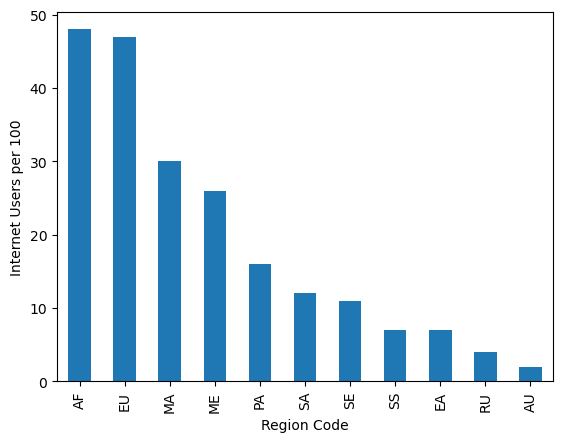

: 

: 

In [ ]:
# Bar chart for regions and Internet Users per 100
region_internet = world_bank_df["Region Code"].value_counts()
region_internet.plot(kind="bar")
plt.ylabel("Internet Users per 100")
plt.show()

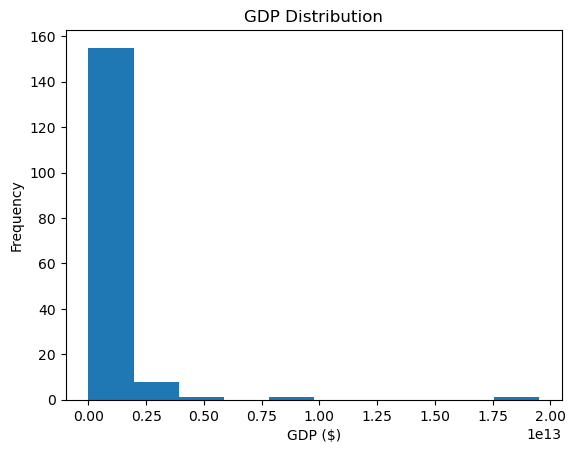

: 

: 

In [ ]:
# Histogram for GDP
world_bank_df["GDP ($)"].plot(kind='hist', title='GDP Distribution')
plt.xlabel('GDP ($)')
plt.show()                                                                                                                                                             # Scatter plot for Internet users vs. GDP



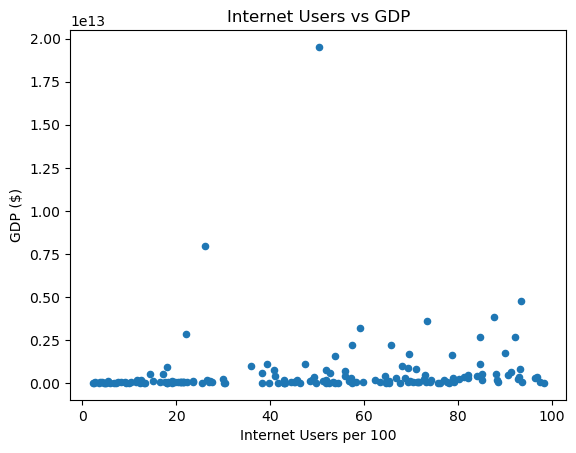

: 

: 

In [ ]:
world_bank_df.plot.scatter(x='Internet Users per 100', y='GDP ($)', title='Internet Users vs GDP')
plt.show()

In [ ]:
# Statistics Table
means = world_bank_df.groupby("GDP ($)")["Internet Users per 100"].mean()
print(means.shape)
means

(166,)


GDP ($)
2.089545e+08    13.0
3.254551e+08     NaN
8.196798e+08    67.6
1.144454e+09    25.4
1.207198e+09    51.8
                ... 
3.579826e+12    73.4
3.848272e+12    87.6
4.738294e+12    93.3
7.982528e+12    26.0
1.952435e+13    50.3
Name: Internet Users per 100, Length: 166, dtype: float64

: 

: 

In [ ]:
#Outliers
quartiles = world_bank_df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


TypeError: unsupported operand type(s) for -: 'str' and 'str'

: 

: 

In [ ]:
# Create box plot
# plt.boxplot(arr, showmeans=True plt.grid() plt.show()

: 

: 

In [ ]:
means = world_bank_df.groupby("Region Code")["GDP ($)"].mean()


: 

: 

: 

: 

: 

: 